<a href="https://colab.research.google.com/github/webabdullah/COLLECTED_LEARN/blob/main/data_cleanded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

In [8]:
titanic = pd.read_csv("titanic_all.csv")
print("data :",titanic.shape)


data : (1309, 12)


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
display(titanic.describe(include=np.object).transpose())

,count,unique,top,freq
Name,1309,1307,"Kelly, Mr. James",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914


In [14]:
def countplot(column):
  return sns.countplot(x=column, data=titanic)

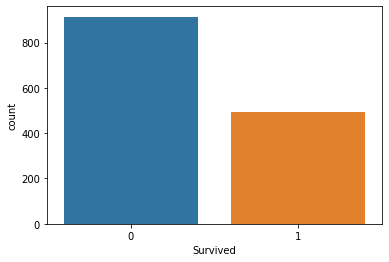

In [16]:
countplot('Pclass')
countplot('Sex')
countplot('Embarked')
countplot('Survived')

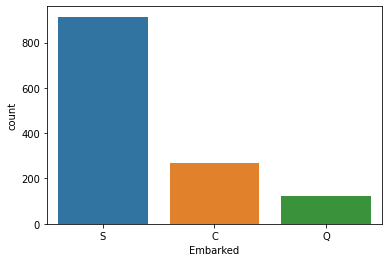

In [17]:
countplot('Embarked')

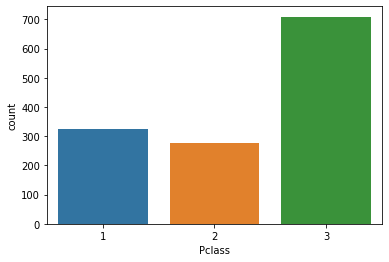

In [18]:
countplot('Pclass')

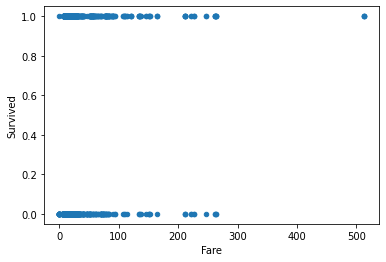

In [19]:
titanic.plot.scatter(x="Fare", y='Survived', figsize=(6,4))

Text(0.5, 1.0, 'Correlation between feature')

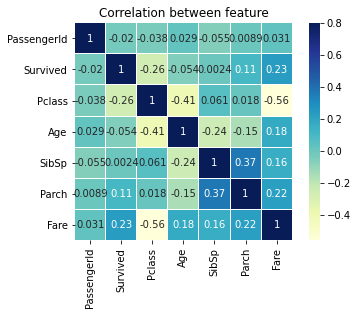

In [21]:
titanic.corr(method='pearson')
corr= titanic.corr() #survived plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True,cmap='YlGnBu', linecolor="white")
plt.title('Correlation between feature')


In [22]:
compute_freq_chi2(titanic.Survived, titanic.Pclass)


Frequency Table
----------------
Pclass      1    2    3
Survived               
0         137  160  518
1         186  117  191
----------------
Chisquare test statistic 91.72367559290264
p-value 1.2090852275863847e-20


In [23]:
compute_freq_chi2(titanic.Survived, titanic.Embarked)

Frequency Table
----------------
Embarked    C   Q    S
Survived              
0         137  69  609
1         133  54  305
----------------
Chisquare test statistic 24.684434014740326
p-value 4.363583182075015e-06


In [24]:
compute_freq_chi2(titanic.Survived, titanic.Sex)

Frequency Table
----------------
Sex       female  male
Survived              
0             81   734
1            385   109
----------------
Chisquare test statistic 617.3133522952658
p-value 2.871410444001617e-136


In [26]:
def cek_null(df) :
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

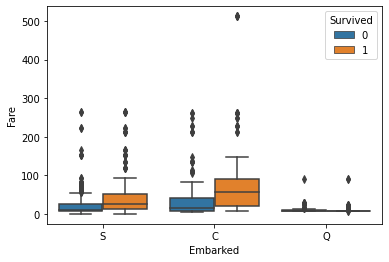

In [30]:
sns.boxplot(x="Embarked", y="Fare", hue="Survived", data=titanic)

Text(0.5, 1.0, 'Correlation between feature')

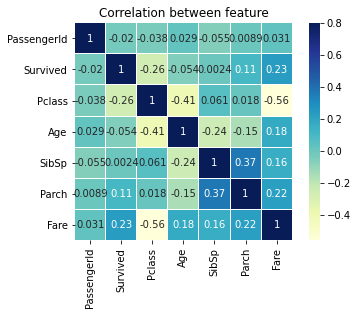

In [31]:
titanic.corr(method='pearson')
corr= titanic.corr() #survived plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True,cmap='YlGnBu', linecolor="white")
plt.title('Correlation between feature')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


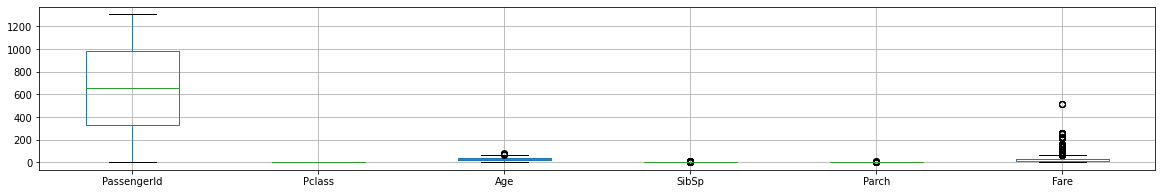

In [32]:
data2=titanic.drop(['Survived'], axis=1)
data2.boxplot(figsize=(20,3))